<a href="https://colab.research.google.com/github/Frinhani/LearningMachineLearning/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(url)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


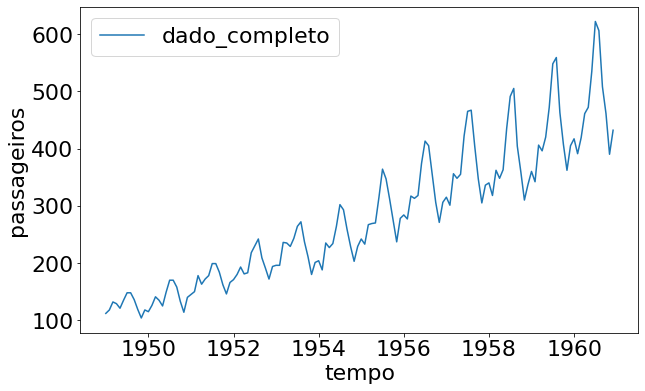

In [3]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [4]:
sc = StandardScaler()

In [5]:
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
dado_escalado = sc.transform(passageiros)

In [7]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

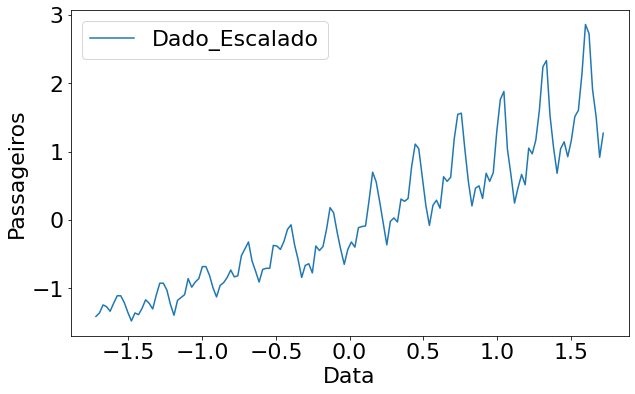

In [8]:
sns.lineplot(x=x,y=y, label='Dado_Escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [9]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [10]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

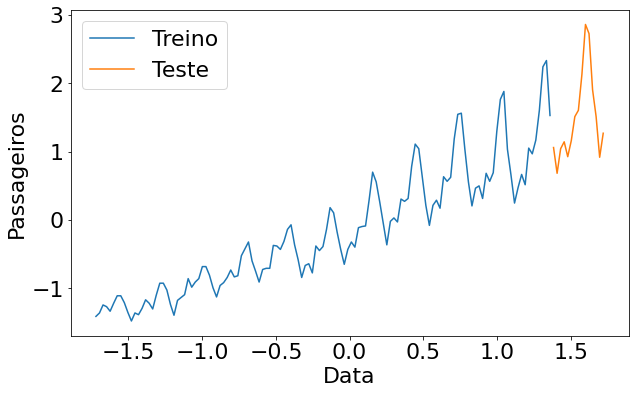

In [11]:
sns.lineplot(x=xtreino, y = ytreino, label="Treino")
sns.lineplot(x=xteste,y=yteste,label='Teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [12]:
regressor = Sequential()

In [13]:
regressor.add(Dense(1, input_dim=1,kernel_initializer='Ones',activation='linear', use_bias=False))

In [14]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [16]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1287


In [17]:
y_predict = regressor.predict(xtreino)

In [18]:
y_predict.shape

(129, 1)

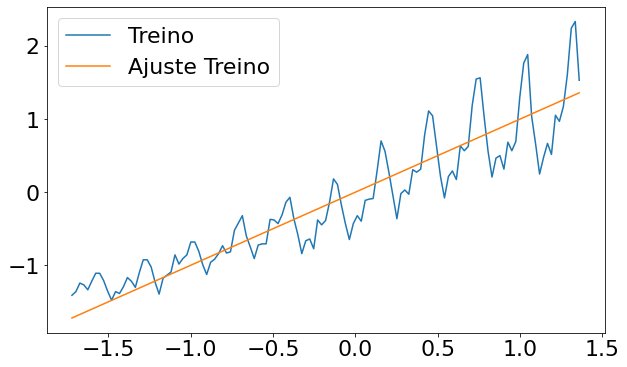

In [19]:
sns.lineplot(x=xtreino,y=ytreino,label='Treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='Ajuste Treino')

In [20]:
d = {'tempo': xtreino, 'passageiros':y_predict[:,0]}

In [21]:
resultados = pd.DataFrame(d)

In [22]:
resultado_transf = sc.inverse_transform(resultados)

In [23]:
resultado_transf = pd.DataFrame(resultado_transf)

In [24]:
resultado_transf.columns = ['tempo', 'passageiros']

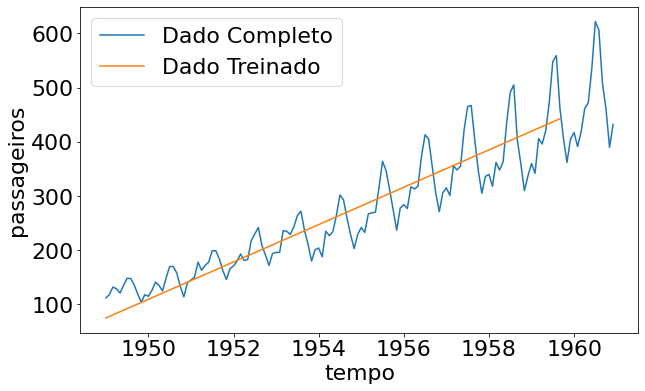

In [25]:
sns.lineplot(x='tempo', y='passageiros',data=passageiros,label='Dado Completo')
sns.lineplot(x='tempo',y='passageiros', data=resultado_transf,label='Dado Treinado')

In [26]:
y_predict_teste = regressor.predict(xteste)

In [27]:
d = {'tempo':xteste, 'passageiros': y_predict_teste[:,0]}

In [28]:
resultado_teste = pd.DataFrame(d)

In [29]:
resultado_transf_teste = sc.inverse_transform(resultado_teste)

In [30]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [31]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

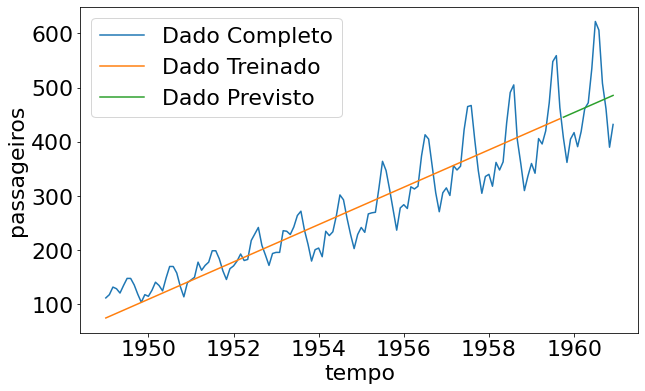

In [32]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='Dado Completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='Dado Treinado')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='Dado Previsto')

In [46]:
regressor2 = Sequential()

In [47]:
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor.add(Dense(1, kernel_initializer='random_uniform',
                    activation = 'linear', use_bias=False))

In [48]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
regressor2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 64        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [50]:
regressor2.fit(xtreino,ytreino,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2354
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 1.2288
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2227
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2169
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2103
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 1.2040
Epoch 7/500
5/5 [==============================] - 0s 4ms/step - loss: 1.1974
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 1.1909
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1852
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1785
Epoch 11/500
5/5 [==============================] - 0s 4ms/step - loss: 1.1723
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1665
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [51]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

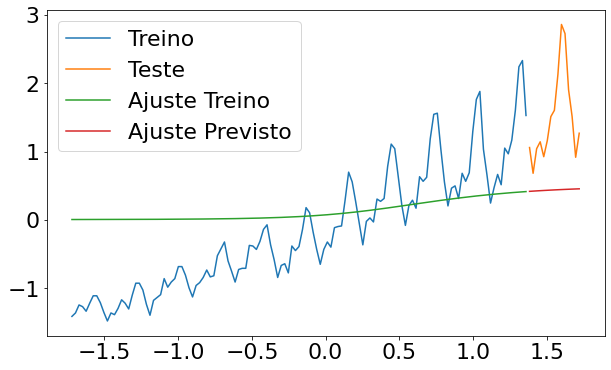

In [52]:
sns.lineplot(x=xtreino,y=ytreino,label='Treino')
sns.lineplot(x=xteste,y=yteste,label='Teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='Ajuste Treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='Ajuste Previsto')

In [55]:
vetor = pd.DataFrame(ytreino)[0]

In [54]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i - 1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [56]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [59]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [60]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [61]:
vetor2 = pd.DataFrame(yteste)[0]

In [62]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [63]:
regressor3 = Sequential()

In [65]:
regressor3.add(Dense(8,input_dim=1, kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

In [66]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
regressor3.fit(xtreino_novo, ytreino_novo,epochs=100)

In [68]:
regressor3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_17 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 64        
Total params: 648
Trainable params: 648
Non-trainable params: 0
_________________________________________________________________


In [69]:
y_predict_novo = regressor3.predict(xtreino_novo)

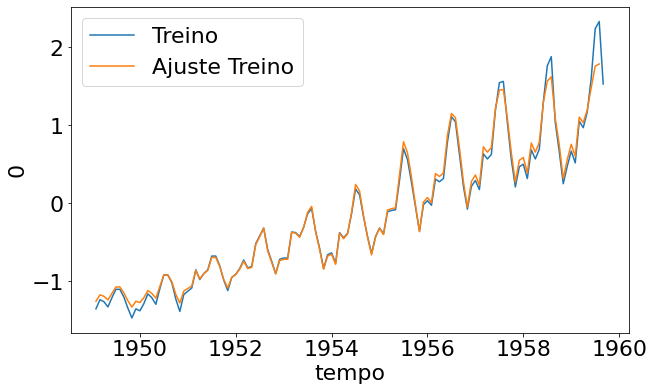

In [71]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='Treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste Treino')


In [75]:
y_predict_teste_novo = regressor3.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

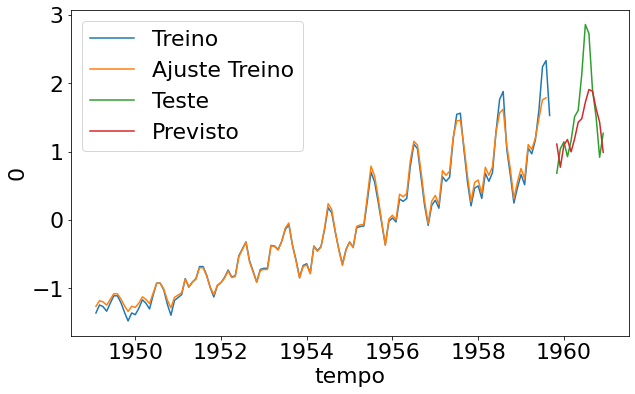

In [77]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='Treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste Treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='Teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='Previsto')

In [80]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)
xteste_novo, yteste_novo = separa_dados(vetor2, 4)


In [ ]:
regressor4 = Sequential()
regressor4.add(Dense(8,input_dim=4, kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))
regressor4.compile(loss='mean_squared_error', optimizer='adam')
regressor4.fit(xtreino_novo, ytreino_novo,epochs=300)


In [83]:
y_predict_novo = regressor4.predict(xtreino_novo)
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [84]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado = pd.DataFrame(y_predict_teste_novo)[0]

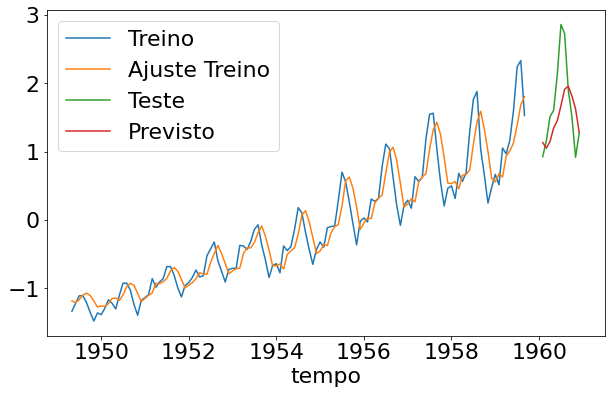

In [86]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='Treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='Ajuste Treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='Teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='Previsto')

In [88]:
bicicletas_url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
bike = pd.read_csv(bicicletas_url)
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [89]:
bike.datas = pd.to_datetime(bike.datas)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

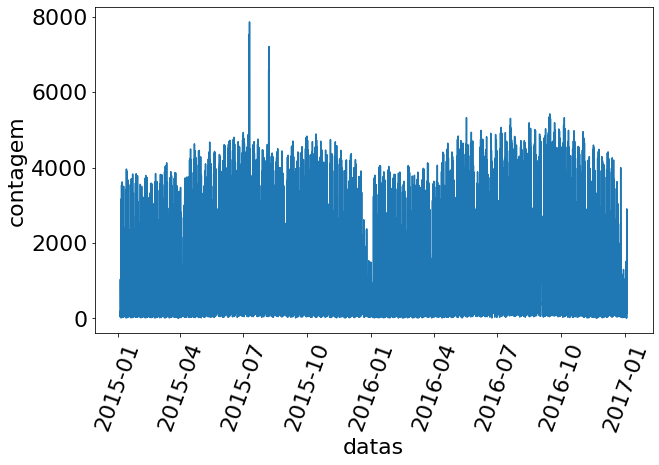

In [90]:
sns.lineplot(x='datas',y='contagem',data=bike)
plt.xticks(rotation=70)

In [91]:
sc2 = StandardScaler()

In [92]:
sc2.fit(bike.contagem.values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
y = sc2.transform(bike.contagem.values.reshape(-1,1))

In [94]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [95]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

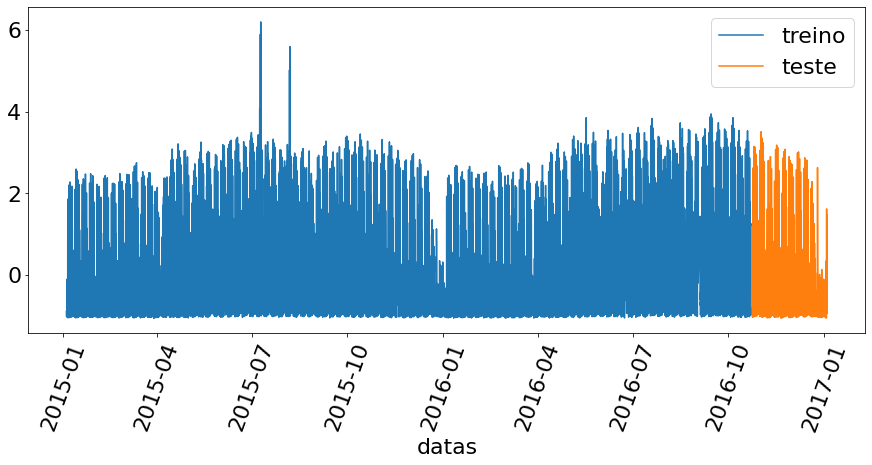

In [99]:
mpl.rcParams['figure.figsize'] = (15,6)
mpl.rcParams['font.size'] = 22
sns.lineplot(x='datas',y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [100]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [101]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [103]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [104]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [109]:
recorrente = Sequential()
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [112]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [113]:
recorrente.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
resultado = recorrente.fit(x=xtreino_novo,y=ytreino_novo,
                           validation_data=(xteste_novo, yteste_novo), epochs=100)

In [115]:
y_ajustado = recorrente.predict(xtreino_novo)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

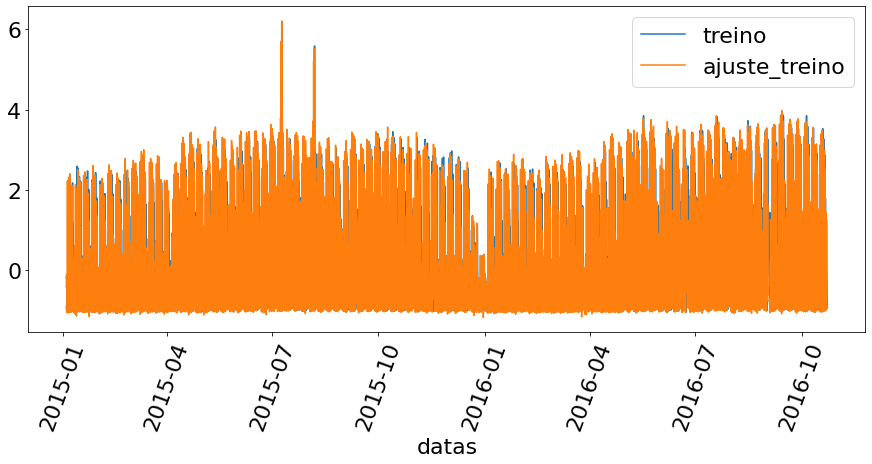

In [116]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

In [117]:
y_predito = recorrente.predict(xteste_novo)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

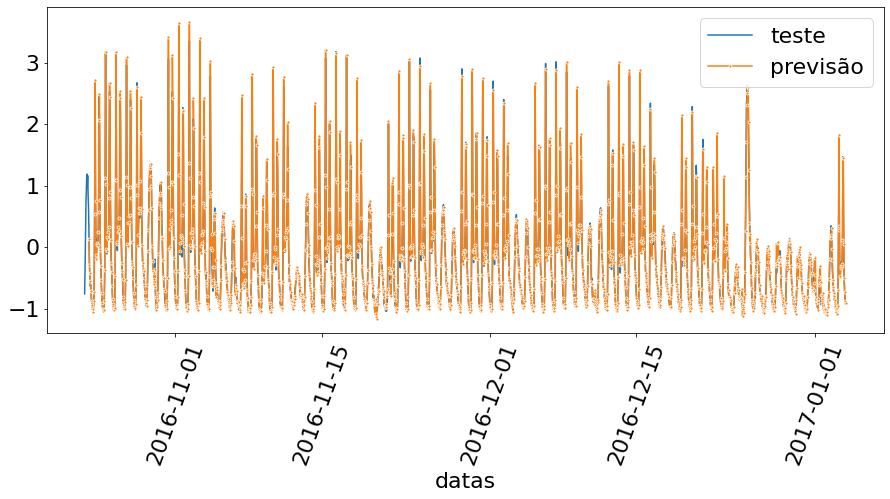

In [118]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

In [120]:
recorrente_g = Sequential()

In [121]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [122]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [123]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 9s 14ms/step - loss: 0.2133 - val_loss: 0.0769
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0673 - val_loss: 0.0440
Epoch 3/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0478 - val_loss: 0.0300
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0424 - val_loss: 0.0304
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0391 - val_loss: 0.0237
Epoch 6/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0372 - val_loss: 0.0289
Epoch 7/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0354 - val_loss: 0.0238
Epoch 8/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0340 - val_loss: 0.0227
Epoch 9/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0333 - val_loss: 0.0212
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.032

In [124]:
y_predito2 = recorrente_g.predict(xteste_novo)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

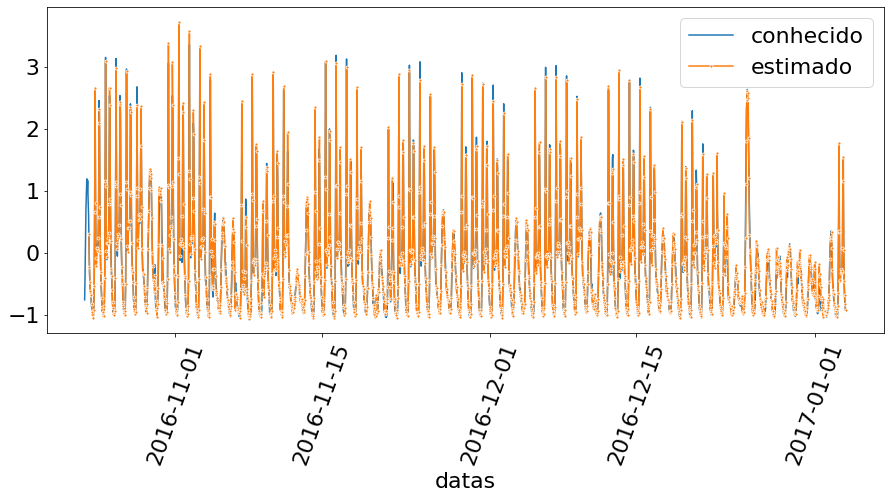

In [125]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

In [126]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


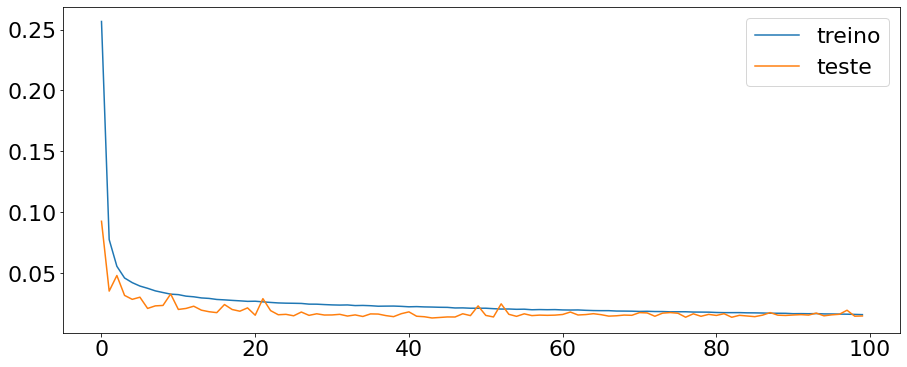

In [127]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

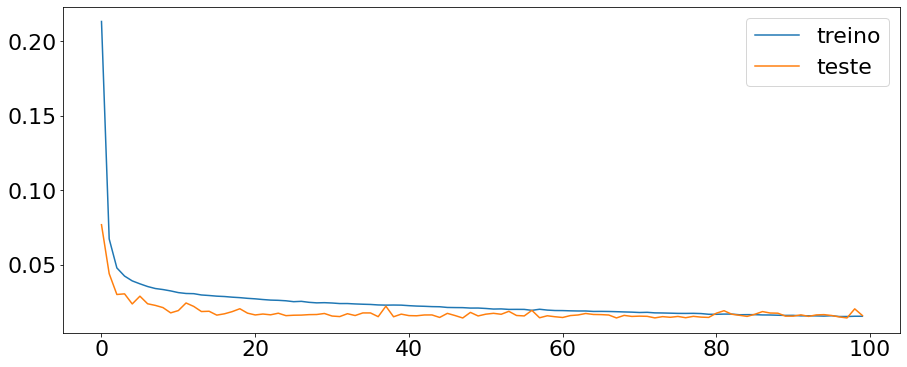

In [128]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
